## Question 2: Given the total acres burned by fires each month in California, and data on wind conditions, can we predict the air quality in SF for the month?


In [1]:
from sqlalchemy import create_engine
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import pandas as pd
import numpy as np
import datetime


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
rds_connection_string = "root:12345678@127.0.0.1/fires"
engine = create_engine(f'mysql+pymysql://{rds_connection_string}')

In [3]:
data = pd.read_sql("select * from final_monthly_total_plus_wind", con=engine)
data.head()

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


,date,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
0,2001-01-31,10551.0,16.78,38.9,48.1,100.569620,158,25
1,2001-02-28,85.6,26.62,44.1,51.0,44.411765,117,30
2,2001-03-31,293.2,21.47,32.0,40.9,39.555556,66,22
3,2001-04-30,92.7,22.59,45.0,53.0,37.675325,49,23
4,2001-05-31,4812.7,21.70,34.9,38.9,39.112532,67,24


In [4]:
data.describe()

,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,43418.972679,19.601071,37.279167,45.858929,48.540700,85.833333,26.125000
std,93763.001672,9.129979,6.143551,8.272611,12.515171,28.118583,7.288074
min,1.510000,9.400000,25.100000,28.000000,22.604113,47.000000,9.000000
25%,318.625000,16.330000,32.825000,39.725000,40.263540,64.000000,21.000000
50%,7628.505000,18.790000,36.900000,45.000000,47.691454,76.000000,26.000000
75%,40459.110000,21.920000,40.900000,51.000000,55.430723,102.250000,31.000000
max,564015.570000,125.040000,59.900000,70.900000,100.569620,179.000000,50.000000


In [5]:
data = data.fillna(0)

## Supervised machine learning

#### Preparing the data

In [6]:
data.head()

,date,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
0,2001-01-31,10551.0,16.78,38.9,48.1,100.569620,158,25
1,2001-02-28,85.6,26.62,44.1,51.0,44.411765,117,30
2,2001-03-31,293.2,21.47,32.0,40.9,39.555556,66,22
3,2001-04-30,92.7,22.59,45.0,53.0,37.675325,49,23
4,2001-05-31,4812.7,21.70,34.9,38.9,39.112532,67,24


In [7]:
X = data.drop(['date', 'mean_aqi', 'max_aqi', 'min_aqi'],axis=1)
X.head()

,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min
0,10551.0,16.78,38.9,48.1
1,85.6,26.62,44.1,51.0
2,293.2,21.47,32.0,40.9
3,92.7,22.59,45.0,53.0
4,4812.7,21.70,34.9,38.9


In [8]:
y = data['min_aqi'].values.reshape(-1,1)
print(X.shape, y.shape)

(168, 4) (168, 1)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Linear Regression

In [10]:
model=LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Linear Regression Training Score: {training_score}")
print(f"Linear Regression Testing Score: {testing_score}")

Linear Regression Training Score: 0.0243808541556233
Linear Regression Testing Score: 0.05008159163479619


Text(0.5,1,'Residual Plot')

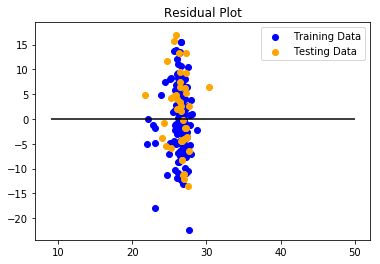

In [13]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

#### K Neighbors Regression

In [14]:
knr = KNeighborsRegressor(n_neighbors=10)

In [15]:
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [16]:
knr.fit(X_train, y_train)
training_score = knr.score(X_train, y_train)
testing_score = knr.score(X_test, y_test)



print(f"K Neighbors Regression Training Score: {training_score}")
print(f"K Neighbors Regression Testing Score: {testing_score}")

K Neighbors Regression Training Score: 0.3014517070490883
K Neighbors Regression Testing Score: 0.1905116381203339


#### Gradient Boosting Regressor

In [17]:
gbr = GradientBoostingRegressor(n_estimators=200)

In [18]:
gbr.fit(X_train, y_train)
training_score = gbr.score(X_train, y_train)
testing_score = gbr.score(X_test, y_test)



print(f"Gradient Boosting Regressor Training Score: {training_score}")
print(f"Gradient Boosting Regressor Testing Score: {testing_score}")

Gradient Boosting Regressor Training Score: 0.976076467855866
Gradient Boosting Regressor Testing Score: -0.42535024742302835


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Random Forest Regressor

In [19]:
rfr = RandomForestRegressor(n_estimators=50)

In [20]:
rfr.fit(X_train, y_train)
training_score = rfr.score(X_train, y_train)
testing_score = rfr.score(X_test, y_test)



print(f"Random Forest Regressor Training Score: {training_score}")
print(f"Random Forest Regressor Testing Score: {testing_score}")

Random Forest Regressor Training Score: 0.8664657045082578
Random Forest Regressor Testing Score: -0.14974046991655676


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


## Unsupervised machine learning

In [21]:
X = data.drop(['date'],axis=1)

In [22]:
X.head()

,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
0,10551.0,16.78,38.9,48.1,100.569620,158,25
1,85.6,26.62,44.1,51.0,44.411765,117,30
2,293.2,21.47,32.0,40.9,39.555556,66,22
3,92.7,22.59,45.0,53.0,37.675325,49,23
4,4812.7,21.70,34.9,38.9,39.112532,67,24


In [23]:
pca = PCA(n_components=2)

In [24]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca_data = pca.transform(X)

In [26]:
kmeans= KMeans(n_clusters=2)

In [27]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

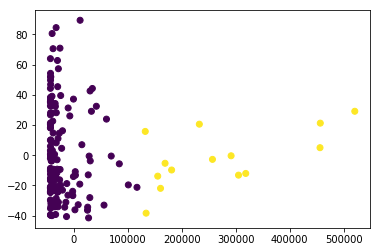

In [28]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=kmeans.labels_)

In [29]:
pca_data

array([[-3.28679749e+04,  8.45115305e+01],
       [-4.33333734e+04,  2.67407897e+01],
       [-4.31257720e+04, -2.30277553e+01],
       [-4.33262720e+04, -3.95688982e+01],
       [-3.86062720e+04, -2.20122500e+01],
       [-3.04661721e+04, -2.04978652e+01],
       [-1.35817713e+04, -4.06161552e+01],
       [ 1.33885729e+05, -3.83585521e+01],
       [-1.84497162e+03, -2.67381811e+01],
       [-2.54938723e+04, -9.41620722e+00],
       [-4.30918736e+04,  2.81054203e+01],
       [-4.20230726e+04, -1.11960332e+01],
       [-4.32792730e+04,  3.82548084e+01],
       [-4.05895730e+04,  2.78931680e+01],
       [-3.95944722e+04, -2.18801893e+01],
       [-4.21782721e+04, -3.17670417e+01],
       [-3.42177718e+04, -3.41338847e+01],
       [ 2.96232281e+04, -2.80630534e+01],
       [ 2.52743286e+04, -3.63955672e+01],
       [ 1.81189628e+05, -9.77518265e+00],
       [-2.86729718e+04, -3.10817448e+01],
       [-7.75772050e+02, -1.41128458e+01],
       [-3.85448746e+04,  7.05636962e+01],
       [-4.